In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Data Preparering

In [2]:
iris = load_iris()

data_iris = iris.data
feat_names = iris.feature_names
target = iris.target
target_names = iris.target_names

df = pd.DataFrame(data_iris, columns=feat_names)
df['target'] = target

# Bar Chart

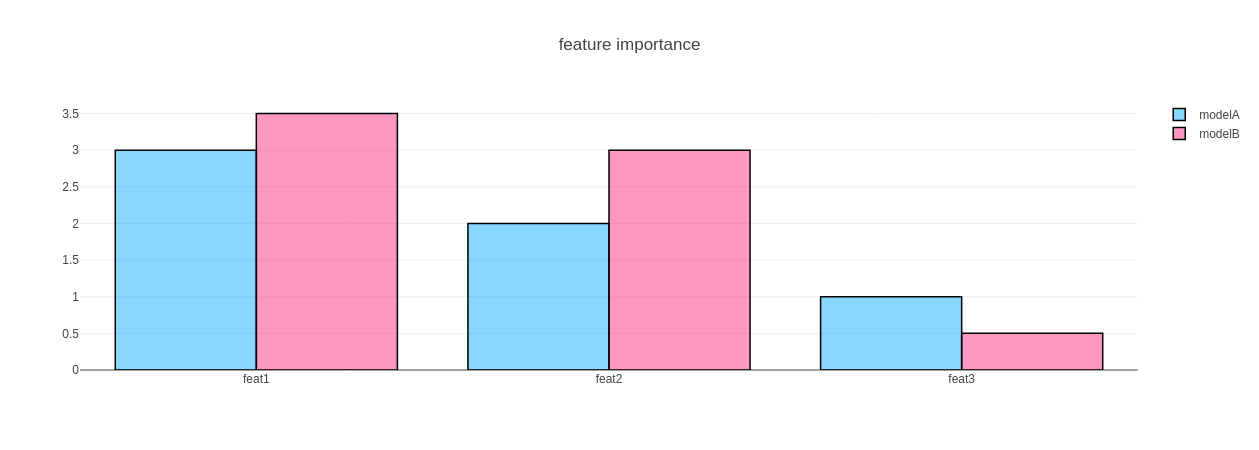

In [14]:
# prepare data frames
# import graph objects as "go"

feat_names_ = ['feat1', 'feat2', 'feat3']
 
# create trace1 
trace1 = go.Bar(x=feat_names_,
                y=[3, 2, 1],
                name="modelA",
                marker=dict(color = 'rgba(20, 174, 255, 0.5)',
                            line=dict(color='rgb(0,0,0)',width=1.5)),
                )
# create trace2 
trace2 = go.Bar(x=feat_names_,
                y=[3.5, 3, 0.5],
                name = "modelB",
                marker = dict(color = 'rgba(255, 50, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
)
data = [trace1, trace2]
layout = go.Layout(barmode = "group", title='feature importance')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Histogram

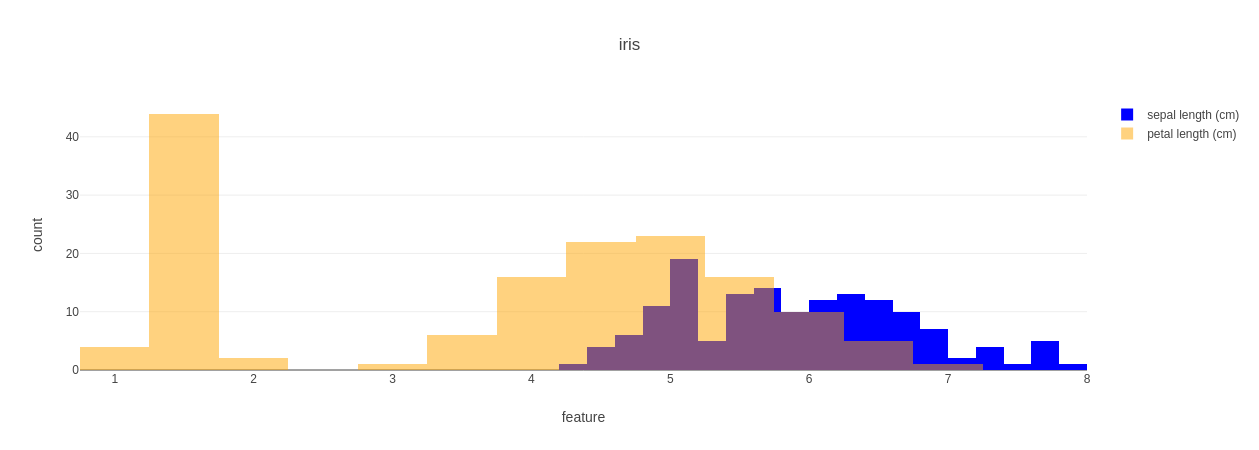

In [30]:
x0 = data_iris[:,0]
x1 = data_iris[:,2]

# trace
trace0 = go.Histogram(x=x0,
                      nbinsx=20,     # bins
                      name=feat_names[0],
                      marker=dict(color='blue'),)
trace1 = go.Histogram(x=x1,
                      name=feat_names[2],
                      marker=dict(color='orange'),
                      opacity=0.5)
data = [trace0, trace1]

# layout
layout = go.Layout(barmode='overlay',
                   title='iris',
                   xaxis=dict(title='feature'),
                   yaxis=dict(title='count'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Scatter Plot

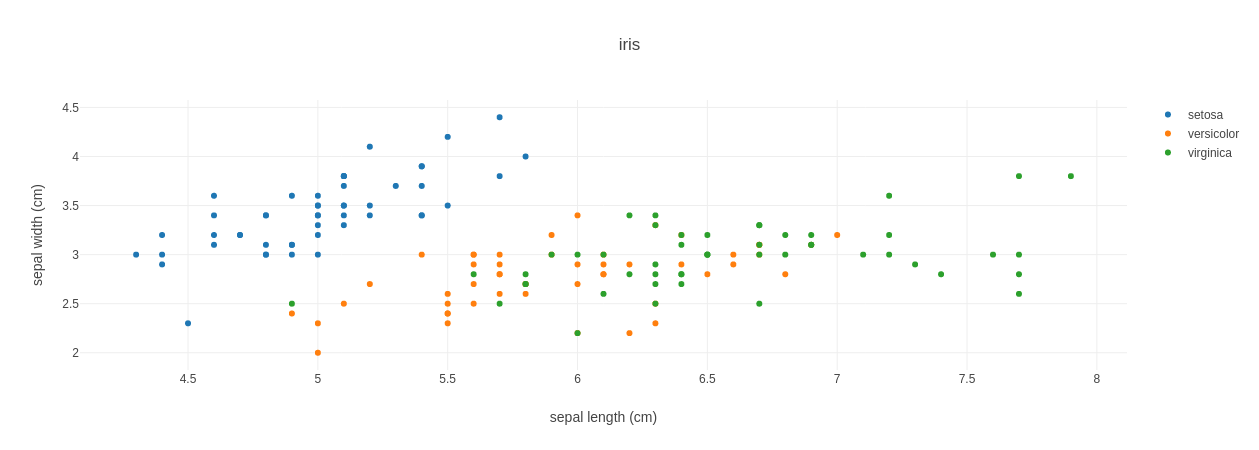

In [50]:
data = []
for i_class, class_ in enumerate(target_names):
    select_idx = df['target']==i_class
    x = df.iloc[:, 0][select_idx].values
    y = df.iloc[:, 1][select_idx].values
    
    trace = go.Scatter(x=x, y=y, mode='markers', name=class_)
    data.append(trace)

layout = go.Layout(title='iris',
                   xaxis=dict(title=feat_names[0]),
                   yaxis=dict(title=feat_names[1]))
    
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Multiple Subplots 

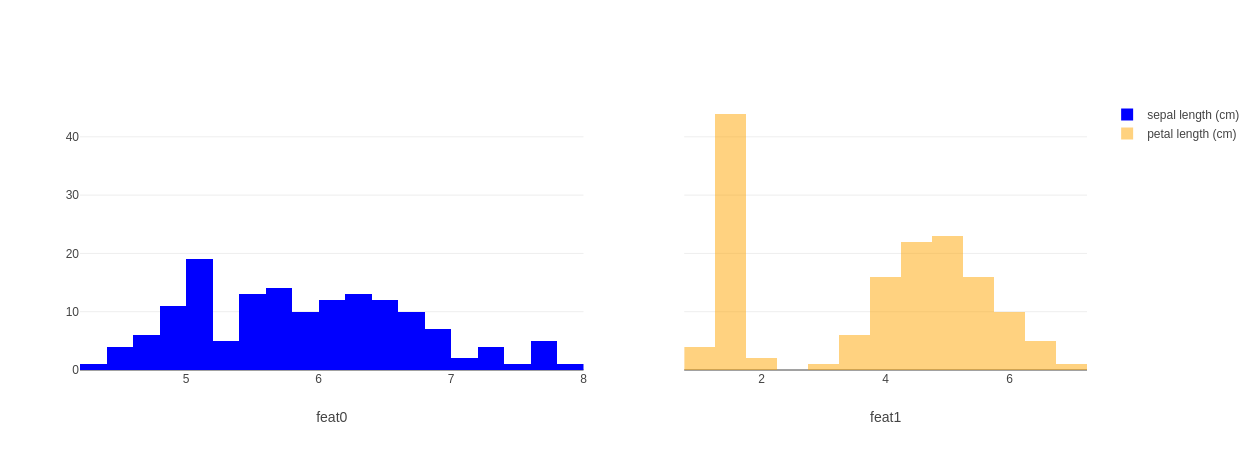

In [79]:
x0 = df.iloc[:, 0]
x1 = df.iloc[:, 1]
x2 = df.iloc[:, 2]


# trace
trace0 = go.Histogram(x=x0,
                      nbinsx=20,     # bins
                      name=feat_names[0],
                      marker=dict(color='blue'),
                      xaxis='x0')
trace1 = go.Histogram(x=x1,
                      name=feat_names[1],
                      marker=dict(color='orange'),
                      opacity=0.5,
                      xaxis='x1')
trace2 = go.Histogram(x=x2,
                      name=feat_names[3],
                      marker=dict(color='orange'),
                      opacity=0.5,
                      xaxis='x2')
data = [trace0, trace1]


# layout = go.Layout(xaxis= dict(domain=[0, 0.4]),
#                    yaxis= dict(domain=[0, 0.4]),
#                    xaxis2=dict(domain=[0.45, 1], anchor='x2'),
#                    yaxis2=dict(domain=[0.45, 1]))
layout = go.Layout(xaxis= dict(domain=[0, 0.5], anchor='x1', title='feat0'),
                   yaxis= dict(),
                   xaxis2=dict(domain=[0.6, 1], anchor='x2', title='feat1'),
                   yaxis2=dict())
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Figure Factory

## scatterplot matrix

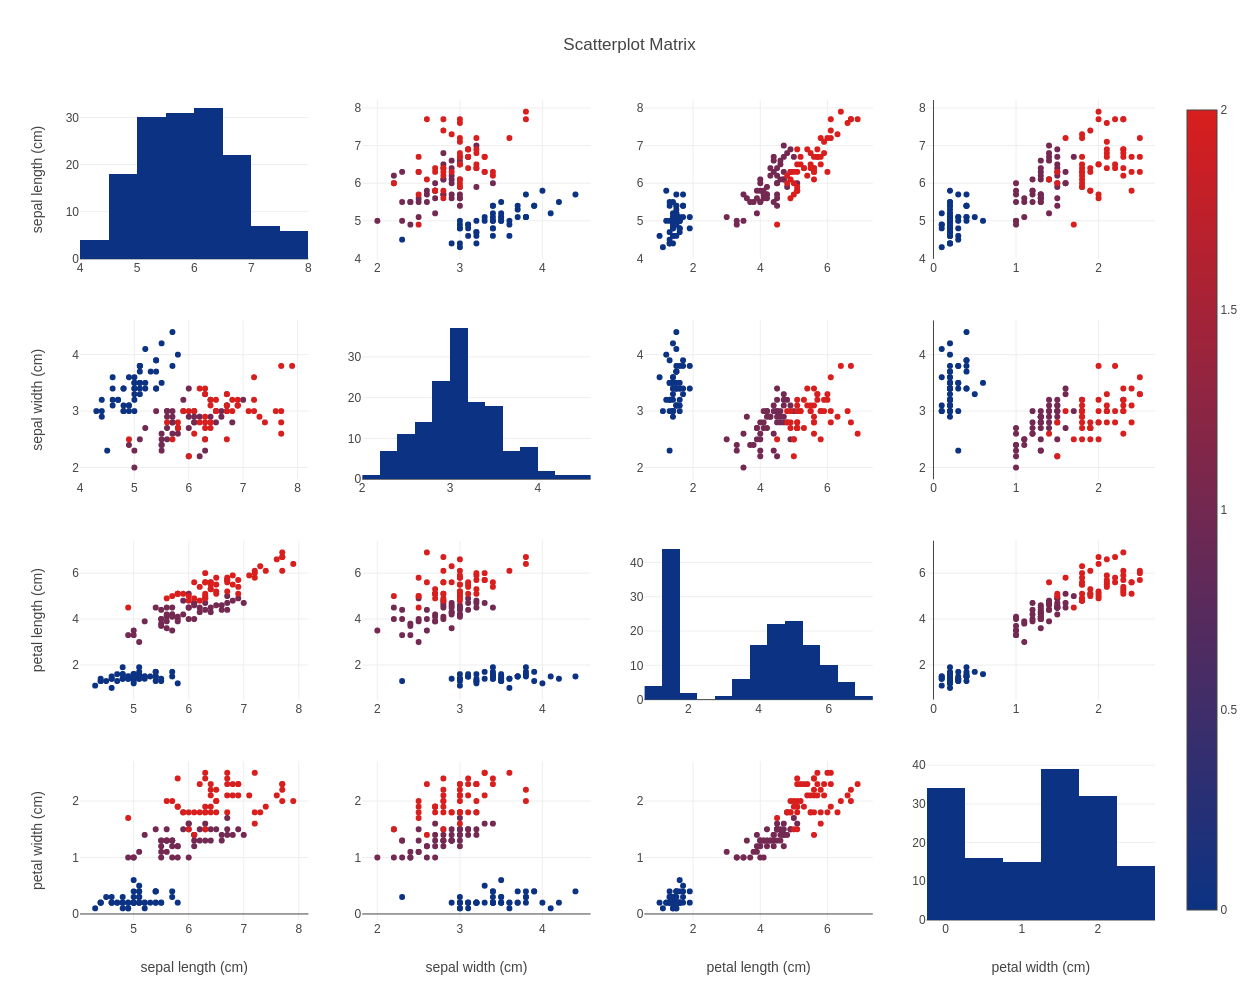

In [23]:
fig = ff.create_scatterplotmatrix(df, index='target',
                                  diag='histogram',
                                  colormap='Portland', 
                                  colormap_type='cat',
                                  height=1000,
                                  width=1000)
iplot(fig)

# distplot

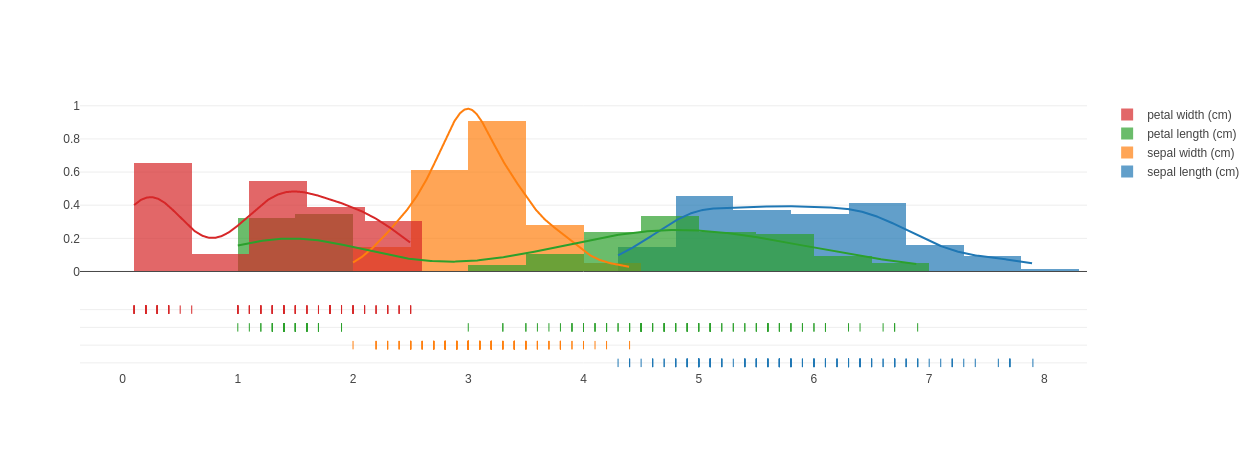

In [50]:
hist_data = [df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3]]
group_labels = feat_names

layout = go.Layout(width=100)
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
iplot(fig)

In [35]:
feat_names

['feat1', 'feat2', 'feat3']

In [32]:
len(df.iloc[:,3])

150

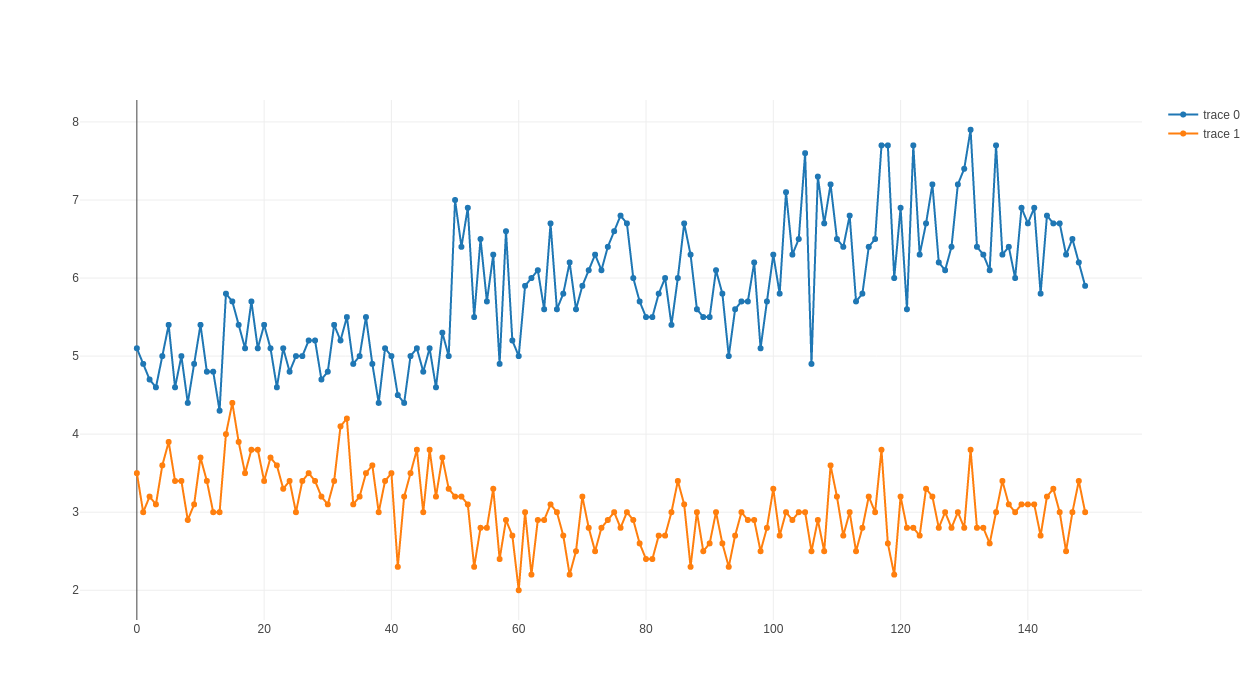

In [60]:
y0 = df.iloc[:, 0]
y1 = df.iloc[:, 1]
trace0 = go.Scatter(y=y0, mode='lines+markers')
trace1 = go.Scatter(y=y1, mode='lines+markers')
data = [trace0, trace1]
layout = go.Layout(width=1000, height=700)
fig = go.Figure(data, layout)
iplot(fig)






# 3D

**minimum**  
**lines**

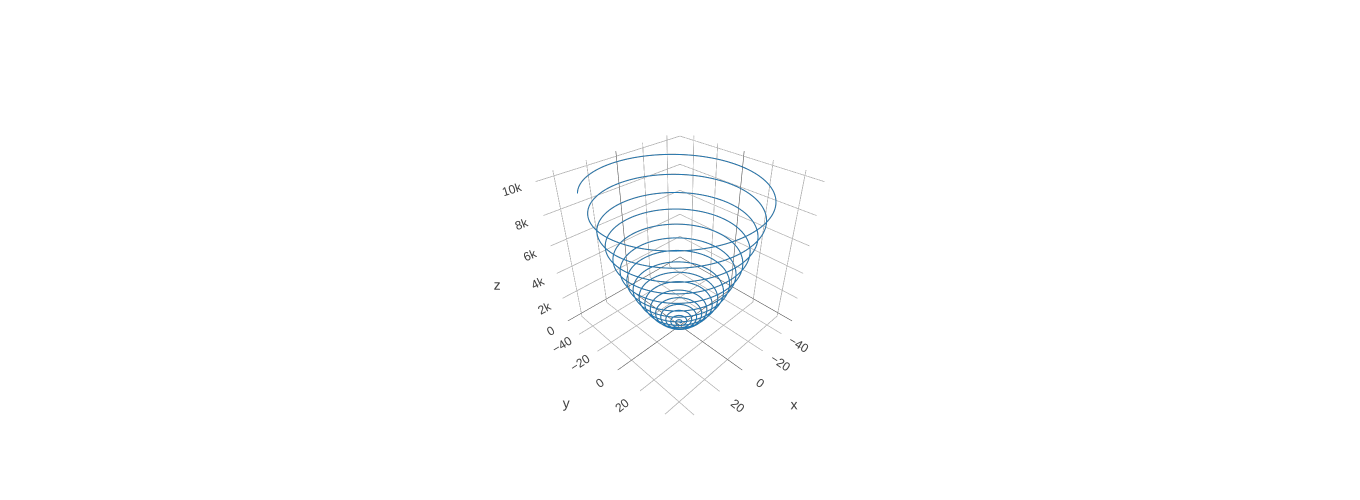

In [10]:
t = np.arange(0, 100, 0.01)
x = np.cos(t) * (0.5*t)
y = np.sin(t) * (0.5*t)
z = t**2

# data
scatter = go.Scatter3d(x=x, y=y, z=z, mode='lines')
data = [scatter]

# layout
layout = go.Layout(width=500, height=500)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

---
**scatter**

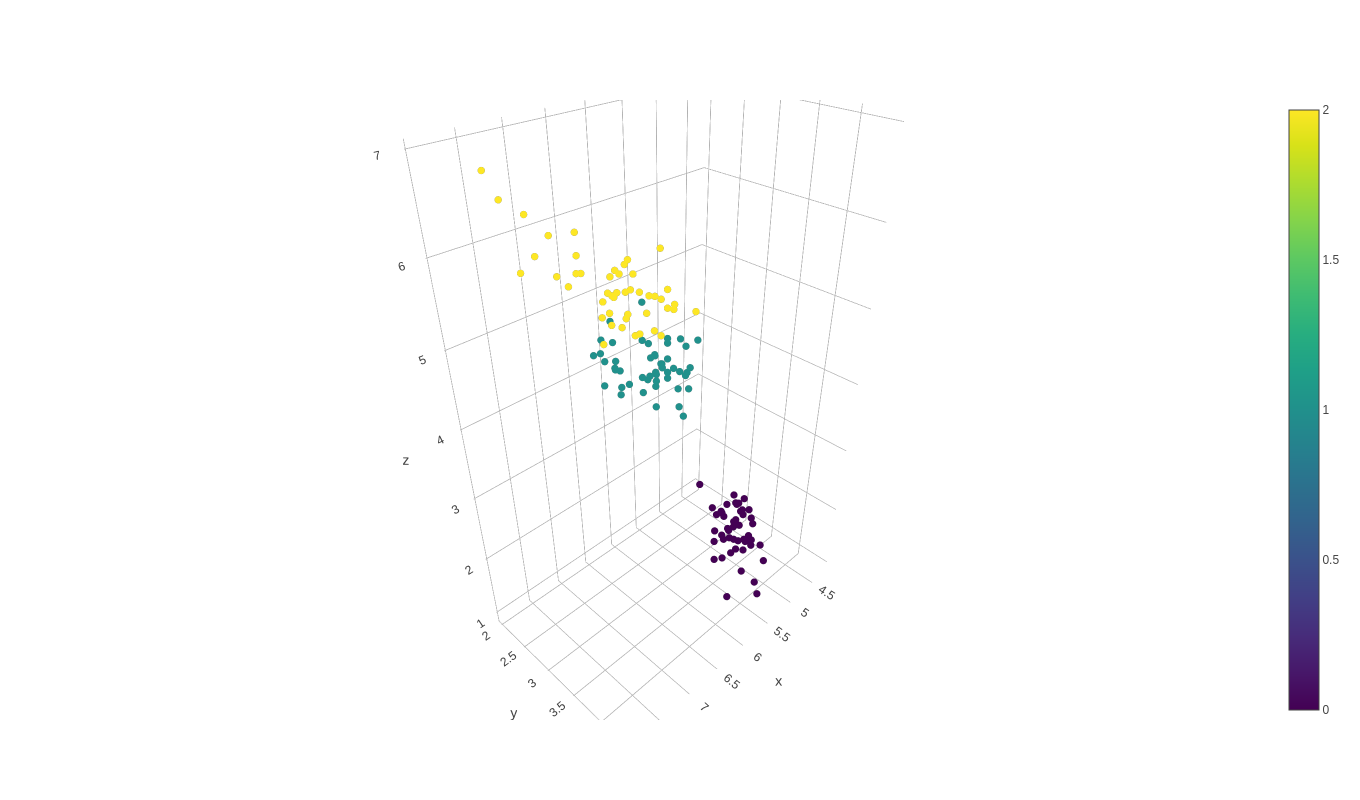

In [15]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]
z = df.iloc[:, 2]

# color、colorscale、showscaleは省略可
scatter = go.Scatter3d(x=x, y=y, z=z, mode='markers',
                       marker=dict(size=2,                  # マーカーのサイズ
                                   color=df['target'],                 # 色分けに使う数値（任意の数値を指定可）
                                   colorscale='Viridis',    # 色のパターン
                                   showscale=True)          # カラーバーを表示
                       )

layout = go.Layout(height=800, width=800)  # 画像サイズの調整
fig = go.Figure(data=[scatter], layout=layout)
iplot(fig, image_width=20, image_height=100)